In [1]:
import numpy as np
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# Linear SVM Classification: Soft Margin Classification

In [2]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

In [3]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = (iris["target"]==2).astype(np.float64)
svm_clf = Pipeline((
    ("scaler",StandardScaler()),
    ("linear_svc",LinearSVC(C=0.1,loss="hinge")),
))
svm_clf.fit(X,y)
svm_clf.predict([[5.5,1.7]])

array([1.])

# Non Linear SVM Classification : Polynomial Kernel

In [4]:
# using polynomial features with Linear SVC
from sklearn.preprocessing import PolynomialFeatures
X,y = datasets.make_moons()
poly_svm_clf = Pipeline((
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=10,loss="hinge")),
))
poly_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [5]:
# using polynomical SVC
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=3,C=5,coef0=1)),
))
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

# GAUSSIAN RBF KERNEL

In [14]:
# exp(-gamma/(x-l)^2) similarity between x and l
rbf_kernel_svm_clf = Pipeline((
    ('scaler',StandardScaler()),
    ('svm_clf',SVC(kernel='rbf',gamma=5,C=0.001)),
))
rbf_kernel_svm_clf.fit(X,y);
from mlxtend.plotting import plot_decision_regions

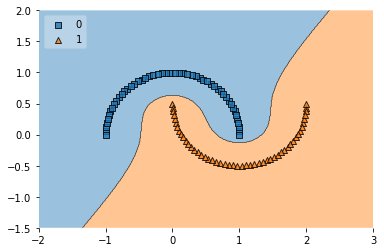

In [15]:
import matplotlib.pyplot as plt
plot_decision_regions(X=X,y=y,clf=rbf_kernel_svm_clf,legend=2)
# plt.plot()
plt.show()